# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from plot_config import *

%matplotlib inline

In [2]:
def plot_box(
    df, size_key, sizes, target_key, tick_labels=None,
    save_filename=None, x_label=None, y_label=None,
    figsize=(11, 6), dpi=200
):
    values = []
    for size in sizes:
        group = df[df[size_key] == size]
        values.append(group[target_key])
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if tick_labels is None:
        tick_labels = sizes
    
    ax.boxplot(values, tick_labels=tick_labels)
    
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
    
    if save_filename is not None:
        plt.savefig(save_filename, bbox_inches='tight', dpi=dpi)
    plt.show()

# Visualization

## Varying data sizes

In [3]:
df = pd.read_csv('./results/result_stats.csv')
df.head(3)

,data_size,run,total_cpu_time (seconds),total_cpu_memory (MB),throughput_bps
0,0.1GB,1,20.79,71461.28,40368672.22
1,0.1GB,2,20.42,71461.28,41100152.32
2,0.1GB,3,19.62,71461.28,42780724.41


In [4]:
data_sizes =['0.1GB', '1GB', '2GB', '4GB', '6GB', '8GB','10GB', 'total']
data_sizes_num =[0.1, 1, 2, 4, 6, 8, 10, 12.6]

### Total_cpu_time

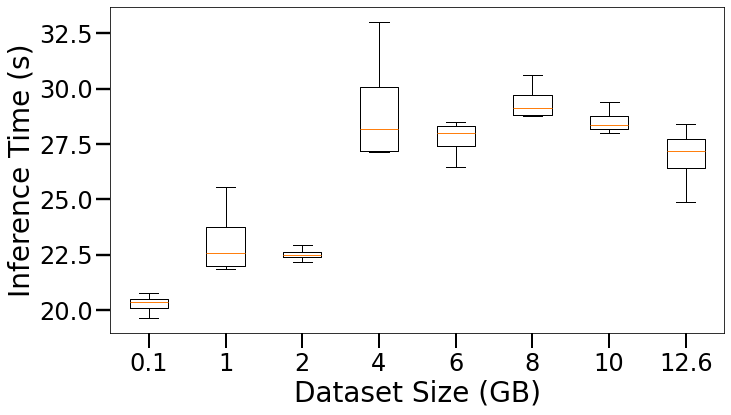

In [5]:
plot_box(
    df, 'data_size', data_sizes, tick_labels=data_sizes_num,
    target_key='total_cpu_time (seconds)',
    save_filename='results/inference_time.jpg',
    x_label='Dataset Size (GB)', y_label='Inference Time (s)'
)

### throughput_bps

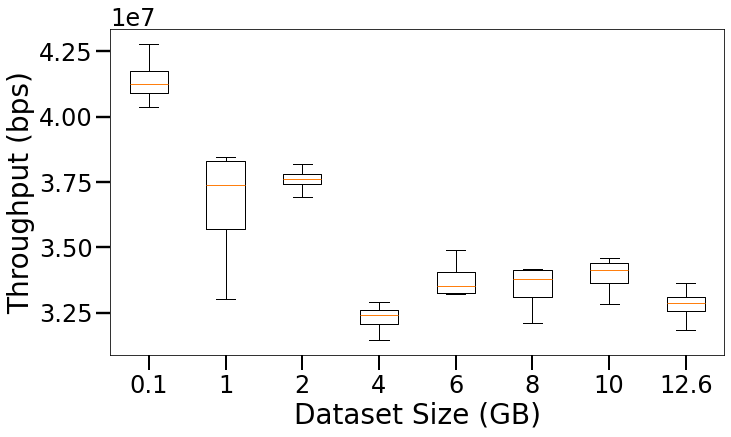

In [6]:
plot_box(
    df, 'data_size', data_sizes, tick_labels=data_sizes_num,
    target_key='throughput_bps',
    save_filename='results/thoughput.jpg',
    x_label='Dataset Size (GB)', y_label='Throughput (bps)'
)

## Varying batch sizes

In [7]:
df = pd.read_csv('./results/batch_varying_results.csv')
df.head(3)

,batch_size,run,total_cpu_time (seconds),total_cpu_memory (MB),throughput_bps
0,32,1,40.17,715180.68,25675770.51
1,32,2,41.06,715181.07,26329206.04
2,32,3,45.06,715180.00,25618090.82


In [8]:
batch_sizes = [32, 64, 128, 256, 512]

### total_cpu_time

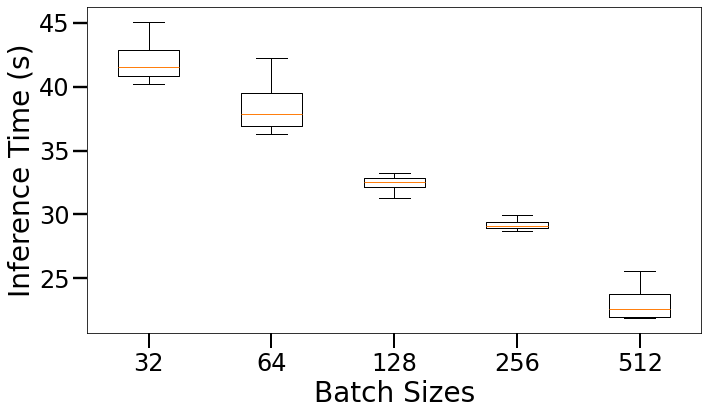

In [9]:
plot_box(
    df, 'batch_size', batch_sizes, 
    target_key='total_cpu_time (seconds)',
    save_filename='results/batch_varying_inference_time.jpg',
    x_label='Batch Sizes', y_label='Inference Time (s)'
)

### throughput_bps

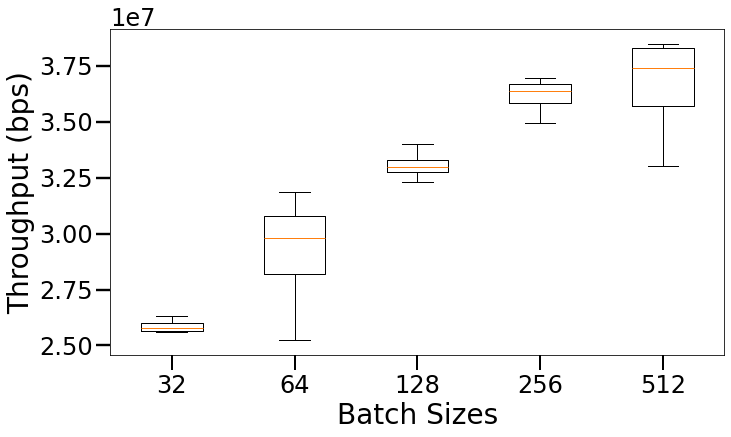

In [10]:
plot_box(
    df, 'batch_size', batch_sizes, 
    target_key='throughput_bps',
    save_filename='results/batch_varying_throughput.jpg',
    x_label='Batch Sizes', y_label='Throughput (bps)'
)